# Repo link

In [1]:
!git clone https://github.com/SaumyaMishra210/age_gender_and_emotion_detection.git

Cloning into 'age_gender_and_emotion_detection'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 41 (delta 1), reused 1 (delta 0), pack-reused 36 (from 1)
Receiving objects: 100% (41/41), 99.49 MiB | 11.45 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Updating files: 100% (30/30), done.


# Requirements

In [3]:
!pip install fer

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 86.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━

# Detect.py file

  if event.key is 'enter':



Saving girl1.jpg to girl1.jpg
Gender: Female
Age: 25-32 years
Emotion: happy


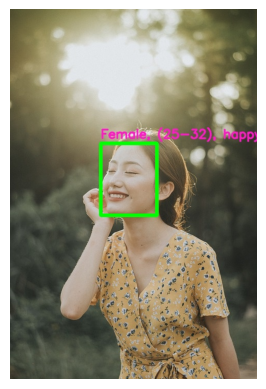

In [1]:
# detect.py
import cv2
import numpy as np
from keras.models import load_model
from fer import FER
import matplotlib.pyplot as plt
from google.colab import files

# Function to detect faces
def highlightFace(net, frame, conf_threshold=0.7):
    frameOpencvDnn = frame.copy()
    frameHeight = frameOpencvDnn.shape[0]
    frameWidth = frameOpencvDnn.shape[1]
    blob = cv2.dnn.blobFromImage(frameOpencvDnn, 1.0, (300, 300), [104, 117, 123], True, False)

    net.setInput(blob)
    detections = net.forward()
    faceBoxes = []
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > conf_threshold:
            x1 = int(detections[0, 0, i, 3] * frameWidth)
            y1 = int(detections[0, 0, i, 4] * frameHeight)
            x2 = int(detections[0, 0, i, 5] * frameWidth)
            y2 = int(detections[0, 0, i, 6] * frameHeight)
            faceBoxes.append([x1, y1, x2, y2])
            cv2.rectangle(frameOpencvDnn, (x1, y1), (x2, y2), (0, 255, 0), int(round(frameHeight / 150)), 8)
    return frameOpencvDnn, faceBoxes

# Emotion detection
def detect_emotion(face_image):
    detector = FER(mtcnn=True)
    emotions = detector.detect_emotions(face_image)
    if emotions:
        # Get the emotions dictionary for the first detected face
        emotion = emotions[0]['emotions']
        # Sort emotions by score in descending order
        max_emotion = max(emotion, key=emotion.get)
        return max_emotion
    return None

# Load models
faceProto = "/content/age_gender_and_emotion_detection/emotion_detection_model/opencv_face_detector.pbtxt"
faceModel = "/content/age_gender_and_emotion_detection/emotion_detection_model/opencv_face_detector_uint8.pb"
ageProto = "/content/age_gender_and_emotion_detection/emotion_detection_model/age_deploy.prototxt"
ageModel = "/content/age_gender_and_emotion_detection/emotion_detection_model/age_net.caffemodel"
genderProto = "/content/age_gender_and_emotion_detection/emotion_detection_model/gender_deploy.prototxt"
genderModel = "/content/age_gender_and_emotion_detection/emotion_detection_model/gender_net.caffemodel"

MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
ageList = ['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
genderList = ['Male', 'Female']

# Load pre-trained models
faceNet = cv2.dnn.readNet(faceModel, faceProto)
ageNet = cv2.dnn.readNet(ageModel, ageProto)
genderNet = cv2.dnn.readNet(genderModel, genderProto)

# Upload image
uploaded = files.upload()

# Get the uploaded image file
image_path = next(iter(uploaded))

# Using the uploaded image
frame = cv2.imread(image_path)

# Check if image was loaded properly
if frame is None:
    print(f"Error: Unable to load image at path {image_path}")
else:
    padding = 20

    resultImg, faceBoxes = highlightFace(faceNet, frame)
    if not faceBoxes:
        print("No face detected")

    for faceBox in faceBoxes:
        face = frame[max(0, faceBox[1] - padding):min(faceBox[3] + padding, frame.shape[0] - 1),
                     max(0, faceBox[0] - padding):min(faceBox[2] + padding, frame.shape[1] - 1)]

        # Predict Gender
        blob = cv2.dnn.blobFromImage(face, 1.0, (227, 227), MODEL_MEAN_VALUES, swapRB=False)
        genderNet.setInput(blob)
        genderPreds = genderNet.forward()
        gender = genderList[genderPreds[0].argmax()]
        print(f'Gender: {gender}')

        # Predict Age
        ageNet.setInput(blob)
        agePreds = ageNet.forward()
        age = ageList[agePreds[0].argmax()]
        print(f'Age: {age[1:-1]} years')

        # Predict Emotion
        emotion = detect_emotion(face)
        print(f'Emotion: {emotion}')

        # Display result
        label = f'{gender}, {age}, {emotion}'
        cv2.putText(resultImg, label, (faceBox[0], faceBox[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (200, 25, 255), 2, cv2.LINE_AA)

    # Save and display in Colab
    cv2.imwrite("/content/age_gender_and_emotion_detection/outputs/output.jpg", resultImg)
    img = cv2.imread("/content/age_gender_and_emotion_detection/outputs/output.jpg")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
